# Análisis temporal de tópicos
Breve cuaderno para explorar la evolución de temas en letras de canciones y probar modelos de series temporales sobre sus probabilidades anuales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path

RESULTS_DIR = Path("results")
RESULTS_DIR.mkdir(exist_ok=True)

def save_current_fig(filename, dpi = 300) -> None:
    output_path = RESULTS_DIR / f"{filename}.png"
    plt.savefig(output_path, dpi=dpi, bbox_inches="tight")
    print(f"Figura guardada en {output_path}")

## Carga y utilidades
Lectura de los CSV ya procesados y helper para guardar las figuras en `results/`.

In [ ]:
topics_all_year = pd.read_csv("topics_all_year.csv")
doc_topic_year = pd.read_csv("doc_topic_year.csv")
sentiment_by_year = pd.read_csv("sentiment_by_year.csv")

Figura guardada en results\topics_wordclouds.png


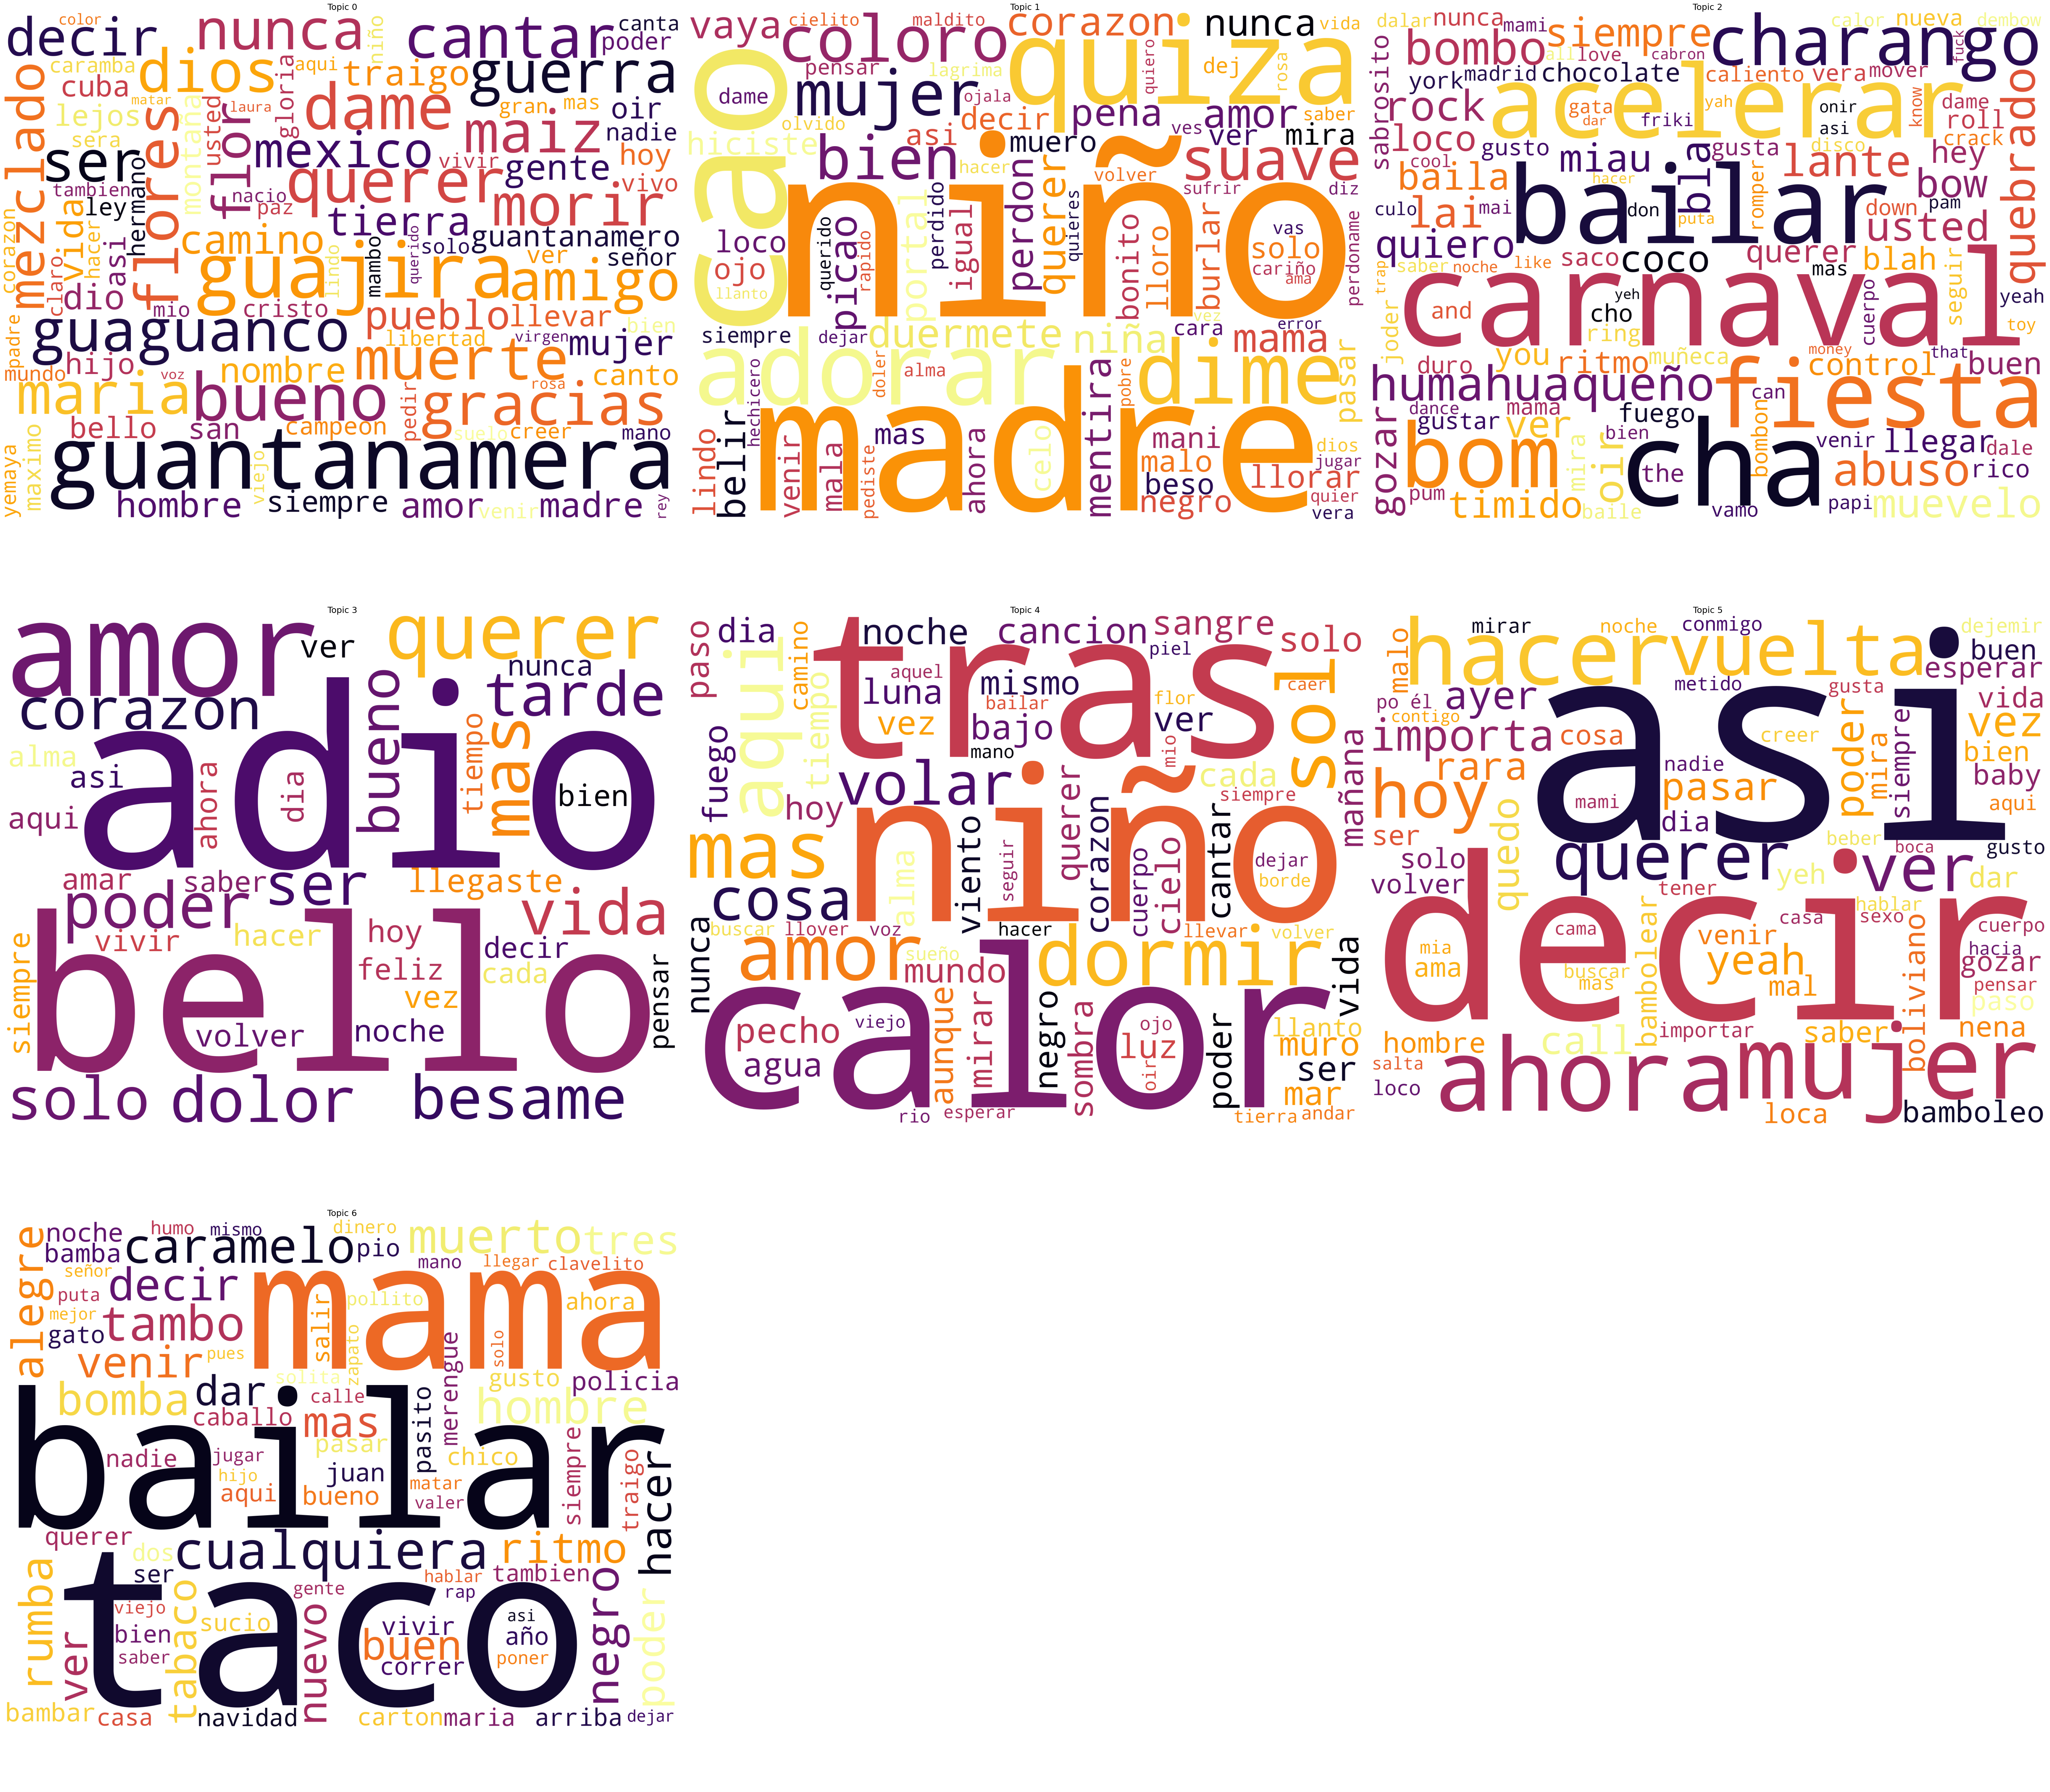

In [5]:
try:
    from wordcloud import WordCloud
except ImportError as exc:
    raise ImportError(
        "wordcloud no está instalado en este entorno. Ejecuta `pip install wordcloud` y vuelve a correr la celda."
    ) from exc

term_weights = (
    topics_all_year.groupby(["topic", "term"])['weight']
    .mean()
    .reset_index()
)

num_topics = term_weights["topic"].nunique()
cols = 3
rows = int(np.ceil(num_topics / cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols * 20, rows * 18))
axes = axes.flatten()

for idx, topic_id in enumerate(sorted(term_weights["topic"].unique())):
    ax = axes[idx]
    topic_terms = term_weights[term_weights["topic"] == topic_id]
    freq_dict = dict(zip(topic_terms["term"], topic_terms["weight"]))
    wc = WordCloud(width=2400, height=1800, background_color="white", colormap="inferno")
    wc.generate_from_frequencies(freq_dict)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title(f"Topic {topic_id}", fontsize=18)
    ax.axis("off")

for extra_ax in axes[num_topics:]:
    extra_ax.axis("off")

plt.tight_layout()
save_current_fig("topics_wordclouds")
plt.show()

### Nubes de palabras por tópico
Visualización rápida de los términos más representativos de cada tópico usando `WordCloud`.

In [6]:
topics_all_year

year  topic  rank          term    weight
0     1940      0     1  guantanamera  0.057507
1     1940      0     2        cantar  0.039226
2     1940      0     3       guajira  0.033163
3     1940      0     4        querer  0.018173
4     1940      0     5          amor  0.014984
...    ...    ...   ...           ...       ...
5665  2022      6     6        querer  0.009710
5666  2022      6     7          aqui  0.008821
5667  2022      6     8           mas  0.007843
5668  2022      6     9           ser  0.007242
5669  2022      6    10        dinero  0.006214

[5670 rows x 5 columns]

### Vistas rápidas de los datos
Chequear las tablas cargadas para asegurarnos de que las columnas esperadas están presentes.

In [7]:
doc_topic_year

doc_index  year  decade                              title  \
0              0  1940    1940               Guajira Guantanamera   
1              1  1940    1940         Cartucho. El General Rueda   
2              2  1940    1940                       Bésame Mucho   
3              3  1940    1940  El Rancho Grande Give Me My Ranch   
4              4  1940    1940              Después que te conocí   
...          ...   ...     ...                                ...   
17077      17077  2022    2020                              Nadie   
17078      17078  2022    2020                         ORO ROSADO   
17079      17079  2022    2020                             Chance   
17080      17080  2022    2020                             PECADO   
17081      17081  2022    2020                     ¿Quién Carajo?   

                                    artist   topic_0   topic_1   topic_2  \
0                           Compay Segundo  0.966848  0.000099  0.000099   
1                        Nellie Campobello  0.000105  0.048006  0.000105   
2                        Consuelo Velzquez  0.000294  0.000294  0.000294   
3                               Gene Autry  0.000270  0.000270  0.531049   
4                             Eduard Toldr  0.000243  0.000243  0.000243   
...                                    ...       ...       ...       ...   
17077  Miky Woodz, Jay Wheeler & Nio Garca  0.000109  0.000109  0.000109   
17078                                 Mora  0.000101  0.000101  0.131933   
17079                         Paulo Londra  0.000099  0.000099  0.049177   
17080                                 Mora  0.000100  0.000100  0.000100   
17081                          Jay Wheeler  0.117910  0.000098  0.000098   

        topic_3   topic_4   topic_5   topic_6  sentiment_polarity  \
0      0.000099  0.000099  0.032657  0.000099                   0   
1      0.000105  0.000105  0.000105  0.951468                   0   
2      0.998239  0.000294  0.000294  0.000294                   0   
3      0.000270  0.000270  0.000270  0.467602                   1   
4      0.602188  0.396594  0.000243  0.000243                   0   
...         ...       ...       ...       ...                 ...   
17077  0.000109  0.000109  0.999348  0.000109                   0   
17078  0.000101  0.000101  0.839421  0.028242                   0   
17079  0.447405  0.000099  0.350153  0.152968                   0   
17080  0.016745  0.000100  0.982755  0.000100                   0   
17081  0.569256  0.000098  0.312443  0.000098                  -1   

      sentiment_label  
0                 NEU  
1                 NEU  
2                 NEU  
3                 POS  
4                 NEU  
...               ...  
17077             NEU  
17078             NEU  
17079             NEU  
17080             NEU  
17081             NEG  

[17082 rows x 14 columns]

In [8]:
sentiment_by_year

year  mean_polarity  share_positive  share_negative  share_neutral
0   1940       0.300000        0.400000        0.100000       0.500000
1   1941       0.000000        0.000000        0.000000       1.000000
2   1943       0.000000        0.125000        0.125000       0.750000
3   1944      -1.000000        0.000000        1.000000       0.000000
4   1945       0.666667        0.666667        0.000000       0.333333
..   ...            ...             ...             ...            ...
76  2018      -0.146309        0.085906        0.232215       0.681879
77  2019      -0.130125        0.080214        0.210339       0.709447
78  2020      -0.108000        0.102667        0.210667       0.686667
79  2021      -0.116438        0.076484        0.192922       0.730594
80  2022      -0.250000        0.048387        0.298387       0.653226

[81 rows x 5 columns]

### Evolución temporal del tópico 5 (vulgar)
Esta sección resume la probabilidad media anual del tópico 5 para evaluar si las letras se han vuelto más vulgares con el paso del tiempo.

Figura guardada en results\topic5_evolucion.png


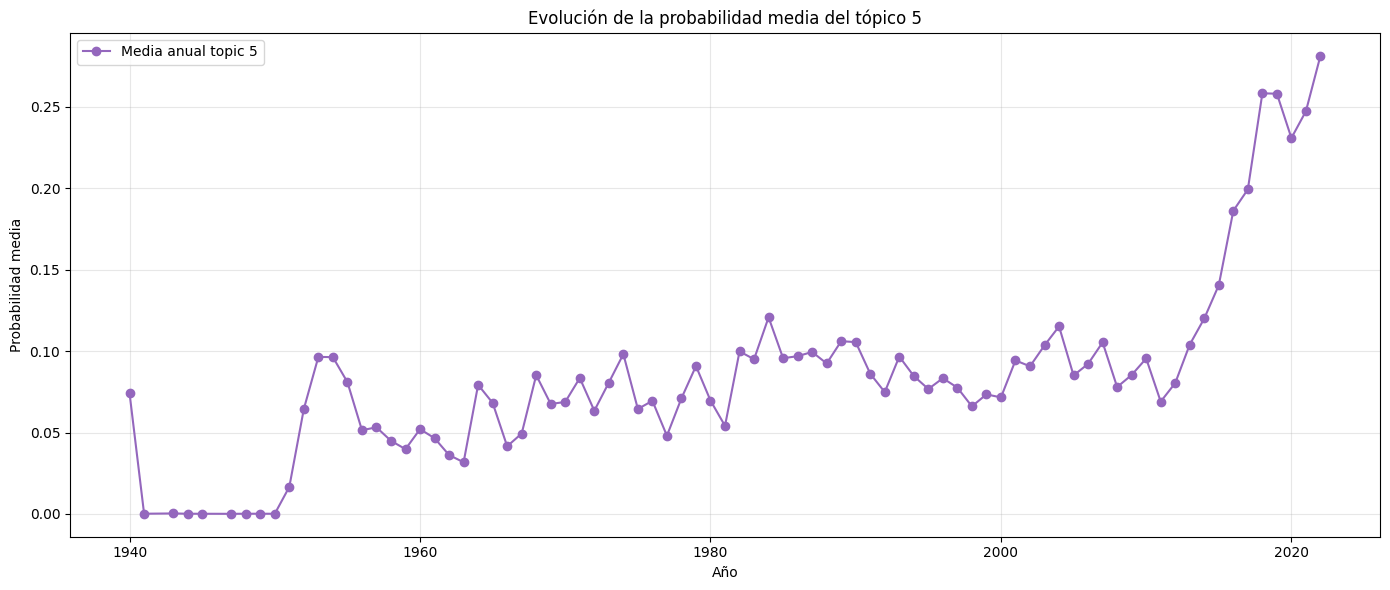

count    81.000000
mean      0.084754
std       0.057593
min       0.000106
25%       0.054136
50%       0.080424
75%       0.096685
max       0.281457
Name: topic_5, dtype: float64

In [5]:
topic_vulgar = (
    doc_topic_year
    .groupby("year")["topic_5"]
    .mean()
    .sort_index()
)


plt.figure(figsize=(14, 6))
plt.plot(topic_vulgar.index, topic_vulgar.values, marker="o", linestyle="-", label="Media anual topic 5", color="tab:purple")
plt.title("Evolución de la probabilidad media del tópico 5")
plt.xlabel("Año")
plt.ylabel("Probabilidad media")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
save_current_fig("topic5_evolucion")
plt.show()

topic_vulgar.describe()

### Evolución temporal de todos los tópicos

Figura guardada en results\topics_all_evolucion.png


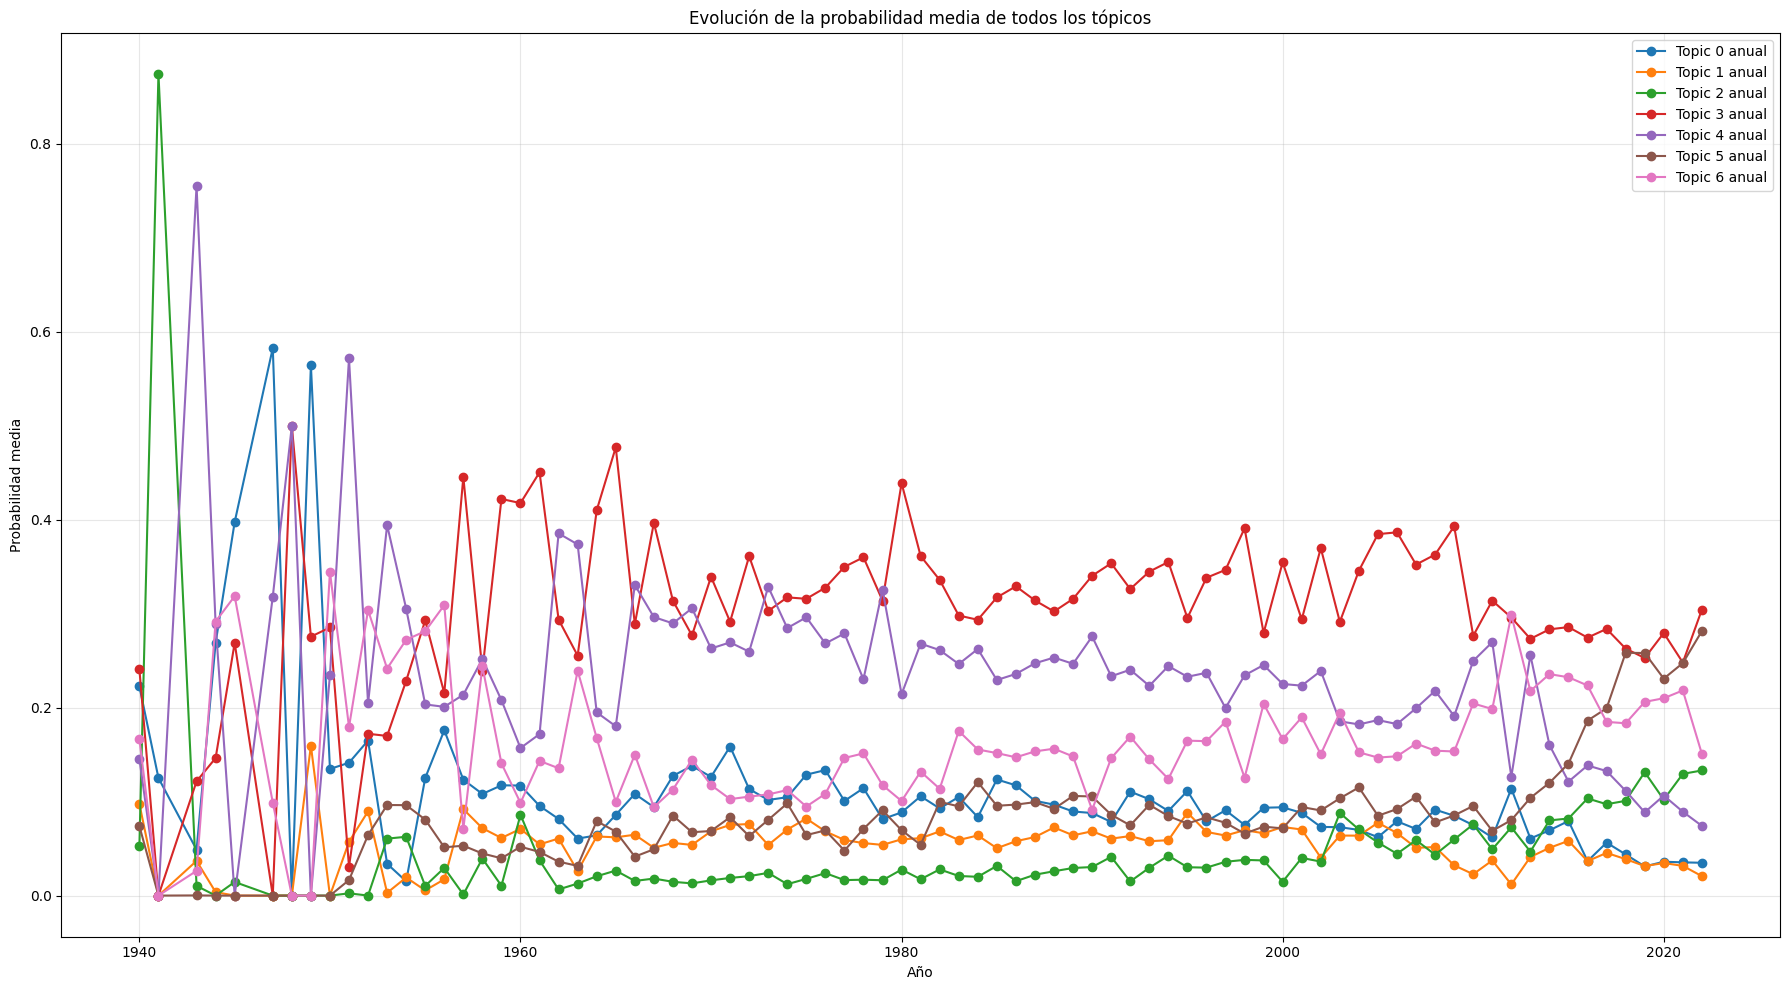


Topic 0 stats:
count    81.000000
mean      0.110332
std       0.091125
min       0.000156
25%       0.073194
50%       0.093602
75%       0.117433
max       0.582491
Name: topic_0, dtype: float64

Topic 1 stats:
count    81.000000
mean      0.052923
std       0.026545
min       0.000106
25%       0.037533
50%       0.059036
75%       0.067865
max       0.159488
Name: topic_1, dtype: float64

Topic 2 stats:
count    81.000000
mean      0.048131
std       0.098331
min       0.000106
25%       0.015724
50%       0.029509
75%       0.053309
max       0.874022
Name: topic_2, dtype: float64

Topic 3 stats:
count    81.000000
mean      0.305654
std       0.089320
min       0.000106
25%       0.276836
50%       0.313724
75%       0.353548
max       0.499554
Name: topic_3, dtype: float64

Topic 4 stats:
count    81.000000
mean      0.235495
std       0.109036
min       0.000139
25%       0.186805
50%       0.234791
75%       0.269417
max       0.754929
Name: topic_4, dtype: float64

Topic 5 s

In [ ]:
num_topics = len([col for col in doc_topic_year.columns if col.startswith('topic_')])
rolling_window = 5
plt.figure(figsize=(18, 10))

for topic_idx in range(num_topics):
    topic_series = (
        doc_topic_year
        .groupby("year")[f"topic_{topic_idx}"]
        .mean()
        .sort_index()
    )
    # Curva anual del tópico
    plt.plot(topic_series.index, topic_series.values, marker="o", linestyle="-", label=f"Topic {topic_idx} anual")

plt.title("Evolución de la probabilidad media de todos los tópicos")
plt.xlabel("Año")
plt.ylabel("Probabilidad media")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
save_current_fig("topics_all_evolucion")
plt.show()

for topic_idx in range(num_topics):
    topic_series = (
        doc_topic_year
        .groupby("year")[f"topic_{topic_idx}"]
        .mean()
        .sort_index()
    )
    print(f"\nTopic {topic_idx} stats:")
    print(topic_series.describe())

### Ejecución de SARIMAX

SARIMAX RMSE: 0.10974 | MAE: 0.09565 | AIC: -292.56 | BIC: -284.32
Figura guardada en results\sarimax_train_test.png


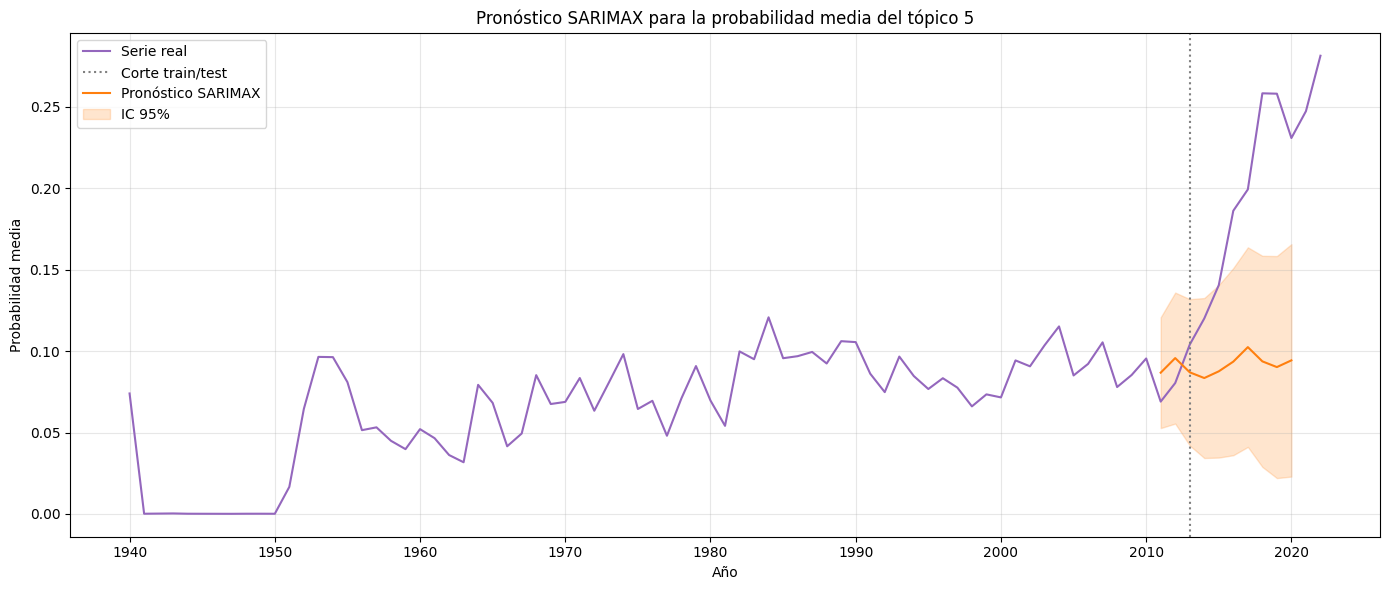

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_series = topic_vulgar.copy()
sarimax_series.index = pd.PeriodIndex(sarimax_series.index, freq="Y")
train_end_year = 2012
train = sarimax_series[sarimax_series.index.year <= train_end_year]
test = sarimax_series[sarimax_series.index.year > train_end_year]

sarimax_model = SARIMAX(
    train,
    order=(1, 1, 1),
    seasonal_order=(0, 1, 1, 5),
    enforce_stationarity=False,
    enforce_invertibility=False,
 )
sarimax_results = sarimax_model.fit(disp=False)

forecast = sarimax_results.get_forecast(steps=len(test))
pred_mean = forecast.predicted_mean
pred_ci = forecast.conf_int()

sarimax_rmse = float(np.sqrt(((pred_mean - test) ** 2).mean()))
sarimax_mae = float((pred_mean - test).abs().mean())
sarimax_aic = float(sarimax_results.aic)
sarimax_bic = float(sarimax_results.bic)
print(f"SARIMAX RMSE: {sarimax_rmse:.5f} | MAE: {sarimax_mae:.5f} | AIC: {sarimax_aic:.2f} | BIC: {sarimax_bic:.2f}")

sarimax_pred_test = pred_mean.copy()

plt.figure(figsize=(14, 6))
plt.plot(sarimax_series.index.to_timestamp(), sarimax_series.values, label="Serie real", color="tab:purple")
plt.axvline(pd.Timestamp(f"{train_end_year+1}-01-01"), color="gray", linestyle=":", label="Corte train/test")
plt.plot(pred_mean.index.to_timestamp(), pred_mean.values, label="Pronóstico SARIMAX", color="tab:orange")
plt.fill_between(
    pred_mean.index.to_timestamp(),
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color="tab:orange",
    alpha=0.2,
    label="IC 95%",
)
plt.title("Pronóstico SARIMAX para la probabilidad media del tópico 5")
plt.xlabel("Año")
plt.ylabel("Probabilidad media")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
save_current_fig("sarimax_train_test")
plt.show()

sarimax_results.summary().tables[1]

### Comparación directa: SARIMAX base vs SARIMAX con exógenas
Para ver **cómo cambia el modelo** al añadir exógenas, aquí comparamos:
- Predicciones en el conjunto de test (misma escala y mismos años).
- Errores en test (residuo = real − predicción) para ver si hay sesgos o años donde mejora/peora.
- Tabla de coeficientes y p-values para inspeccionar qué parámetros se vuelven más/menos relevantes al incluir exógenas.

AIC: -292.56 | BIC: -284.32 | LogLik: 150.28


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           topic_5   No. Observations:                   71
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 5)   Log Likelihood                 150.282
Date:                           Thu, 18 Dec 2025   AIC                           -292.564
Time:                                   16:43:12   BIC                           -284.323
Sample:                               12-31-1940   HQIC                          -289.354
                                    - 12-31-2012                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1129      0.244      0.463      0.644      -0.365       0.591
ma.L1         -0.4821      0.213     -2.266      0.023      -0.899      -0.065
ma.S.L5       -0.9994     35.697     -0.028      0.978     -70.964      68.965
sigma2         0.0003      0.010      0.028      0.978      -0.019       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.78   Prob(JB):                         0.48
Heteroskedasticity (H):               0.55   Skew:                             0.38
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

coef    pvalue
ma.L1   -0.482137  0.023427
ar.L1    0.112938  0.643588
sigma2   0.000280  0.977626
ma.S.L5 -0.999358  0.977666

lb_stat  lb_pvalue
10  13.719831   0.186159

Figura guardada en results\sarimax_residual_diagnostics.png


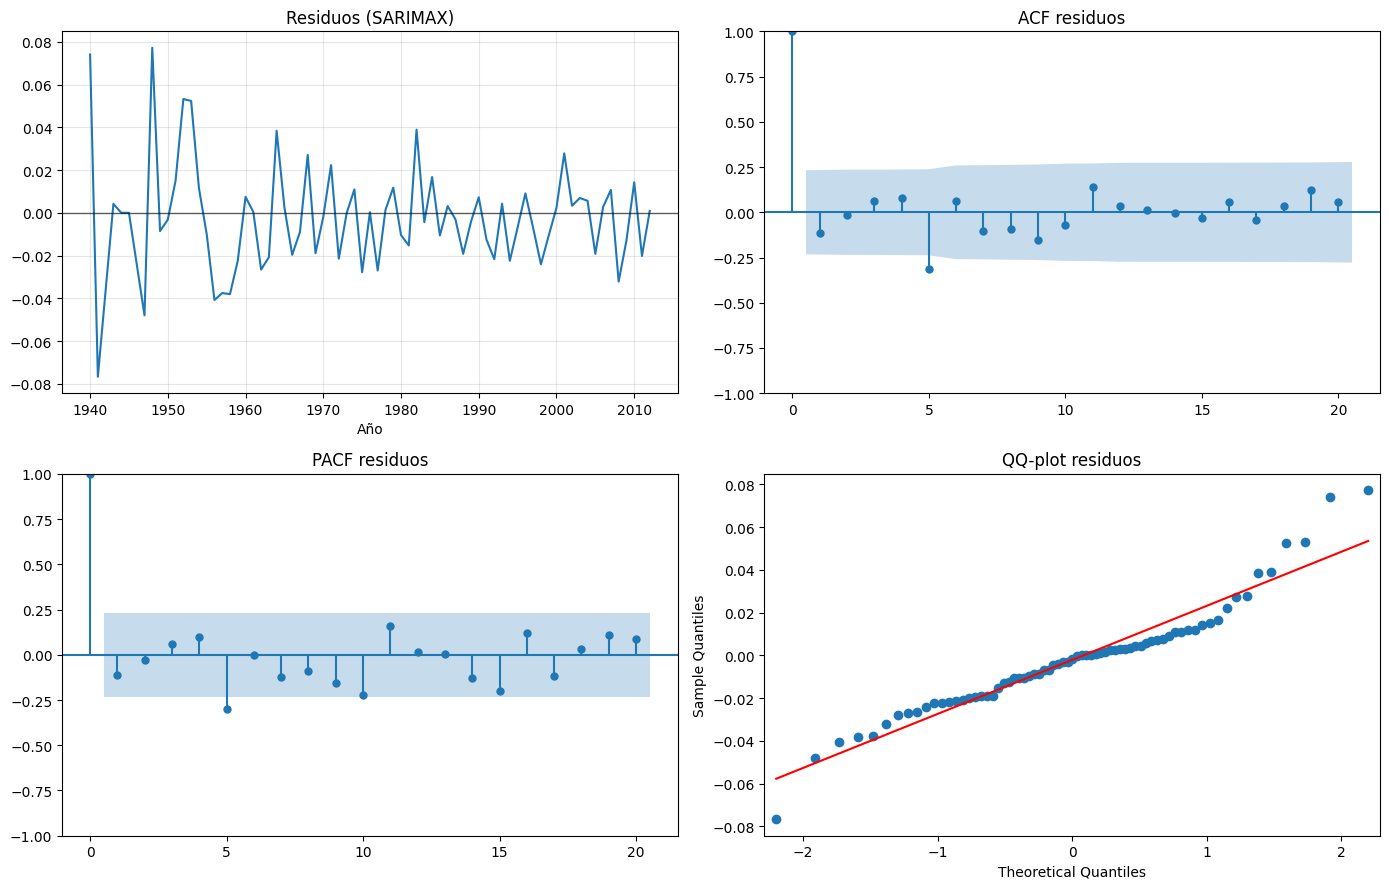

Exógenas candidatas (|corr| más alta con topic_5): ['topic_0', 'topic_4']


topic_0   -0.463185
topic_4   -0.410568
topic_6    0.188313
topic_2    0.112664
topic_3    0.075921
topic_1   -0.055340
Name: topic_5, dtype: float64

c:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


modelo         AIC         BIC  RMSE_test  \
0                      SARIMAX base -292.564472 -284.322700   0.109745   
1  SARIMAX + exog(topic_0, topic_4) -292.393417 -280.030759   0.104869   

   MAE_test  
0  0.095652  
1  0.090777

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

print(f"AIC: {sarimax_results.aic:.2f} | BIC: {sarimax_results.bic:.2f} | LogLik: {sarimax_results.llf:.2f}")
display(sarimax_results.summary())

coef_df = pd.DataFrame({
    "coef": sarimax_results.params,
    "pvalue": sarimax_results.pvalues,
})
display(coef_df.sort_values("pvalue"))

# Residuales alineados al índice temporal del train (evita desajustes x/y)
resid = pd.Series(sarimax_results.resid, index=train.index).dropna()
ljung_box = acorr_ljungbox(resid, lags=[10], return_df=True)
display(ljung_box)

fig, axes = plt.subplots(2, 2, figsize=(14, 9))
axes = axes.ravel()

axes[0].plot(resid.index.to_timestamp(), resid.values, color="tab:blue")
axes[0].axhline(0, color="black", linewidth=1, alpha=0.6)
axes[0].set_title("Residuos (SARIMAX)")
axes[0].set_xlabel("Año")
axes[0].grid(True, alpha=0.3)

sm.graphics.tsa.plot_acf(resid, lags=min(20, len(resid) - 1), ax=axes[1])
axes[1].set_title("ACF residuos")

sm.graphics.tsa.plot_pacf(resid, lags=min(20, len(resid) - 1), ax=axes[2], method="ywm")
axes[2].set_title("PACF residuos")

sm.qqplot(resid, line="s", ax=axes[3])
axes[3].set_title("QQ-plot residuos")

plt.tight_layout()
save_current_fig("sarimax_residual_diagnostics")
plt.show()

# ---- Comparación con exógenas: otros tópicos (¿están relacionados?) ----
topic_cols = [c for c in doc_topic_year.columns if c.startswith("topic_")]
topics_yearly = doc_topic_year.groupby("year")[topic_cols].mean().sort_index()
topics_yearly.index = pd.PeriodIndex(topics_yearly.index, freq="Y")

corr_topic5 = (
    topics_yearly.corr(numeric_only=True)["topic_5"]
    .drop("topic_5")
    .sort_values(key=lambda s: s.abs(), ascending=False)
 )
top_exogs = corr_topic5.head(2).index.tolist()
print("Exógenas candidatas (|corr| más alta con topic_5):", top_exogs)
display(corr_topic5.head(6))

exog = topics_yearly[top_exogs]
train_exog = exog.loc[train.index]
test_exog = exog.loc[test.index]

sarimax_exog_model = SARIMAX(
    train,
    exog=train_exog,
    order=(1, 1, 1),
    seasonal_order=(0, 1, 1, 5),
    enforce_stationarity=False,
    enforce_invertibility=False,
 )
sarimax_exog_res = sarimax_exog_model.fit(disp=False)

exog_forecast = sarimax_exog_res.get_forecast(steps=len(test), exog=test_exog)
exog_pred = exog_forecast.predicted_mean

sarimax_exog_rmse = float(np.sqrt(((exog_pred - test) ** 2).mean()))
sarimax_exog_mae = float((exog_pred - test).abs().mean())

comparison_models = pd.DataFrame(
    {
        "modelo": ["SARIMAX base", f"SARIMAX + exog({', '.join(top_exogs)})"],
        "AIC": [sarimax_results.aic, sarimax_exog_res.aic],
        "BIC": [sarimax_results.bic, sarimax_exog_res.bic],
        "RMSE_test": [sarimax_rmse, sarimax_exog_rmse],
        "MAE_test": [sarimax_mae, sarimax_exog_mae],
    }
)
display(comparison_models)

### Matriz de correlación entre Topics

topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6
topic_0  1.000000  0.132175 -0.116092 -0.357771 -0.180287 -0.463185 -0.071429
topic_1  0.132175  1.000000 -0.278524  0.330179 -0.085497 -0.055340 -0.408551
topic_2 -0.116092 -0.278524  1.000000 -0.368663 -0.387460  0.112664 -0.169190
topic_3 -0.357771  0.330179 -0.368663  1.000000 -0.151810  0.075921 -0.247182
topic_4 -0.180287 -0.085497 -0.387460 -0.151810  1.000000 -0.410568 -0.217920
topic_5 -0.463185 -0.055340  0.112664  0.075921 -0.410568  1.000000  0.188313
topic_6 -0.071429 -0.408551 -0.169190 -0.247182 -0.217920  0.188313  1.000000

Figura guardada en results\topics_corr_heatmap.png


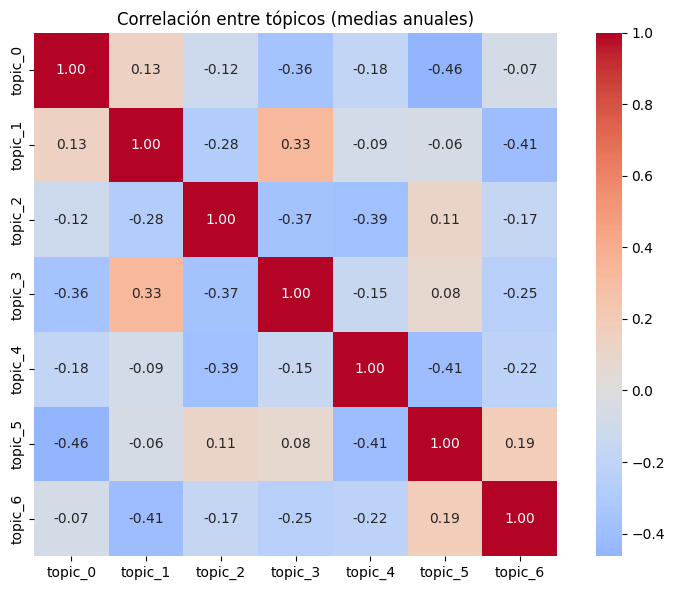

topic_a  topic_b      corr  abs_corr
4   topic_0  topic_5 -0.463185  0.463185
18  topic_4  topic_5 -0.410568  0.410568
10  topic_1  topic_6 -0.408551  0.408551
12  topic_2  topic_4 -0.387460  0.387460
11  topic_2  topic_3 -0.368663  0.368663
2   topic_0  topic_3 -0.357771  0.357771
7   topic_1  topic_3  0.330179  0.330179
6   topic_1  topic_2 -0.278524  0.278524
17  topic_3  topic_6 -0.247182  0.247182
19  topic_4  topic_6 -0.217920  0.217920

In [ ]:
topic_cols_all = [f"topic_{i}" for i in range(7)]
topics_yearly_all = doc_topic_year.groupby("year")[topic_cols_all].mean().sort_index()

corr_all = topics_yearly_all.corr(numeric_only=True)
display(corr_all)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_all, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Correlación entre tópicos (medias anuales)")
plt.tight_layout()
save_current_fig("topics_corr_heatmap")
plt.show()

pairs = (
    corr_all.where(np.triu(np.ones(corr_all.shape), k=1).astype(bool))
    .stack()
    .rename("corr")
    .reset_index()
    .rename(columns={"level_0": "topic_a", "level_1": "topic_b"})
 )
pairs["abs_corr"] = pairs["corr"].abs()
pairs_sorted = pairs.sort_values("abs_corr", ascending=False)
display(pairs_sorted.head(10))

## SARIMAX: ajuste, validación y diagnóstico
Split temporal: hasta 2012 como train y el resto como test. Además de RMSE/MAE, se reportan AIC/BIC, coeficientes (con p-valores) y un diagnóstico de residuos (Ljung–Box + ACF/PACF/QQ-plot).
También se compara el SARIMAX base frente a una variante con variables **exógenas** (otros tópicos) para evaluar si hay relación entre tópicos.

### Holt-Winters como modelo alternativo
Para evaluar un enfoque de suavizado exponencial, se entrena un modelo Holt-Winters (ETS) sobre el mismo periodo de entrenamiento y se comparan sus métricas con el SARIMAX anterior.

Holt-Winters RMSE: 0.13511 | MAE: 0.12146
Figura guardada en results\comparacion_sarimax_holtwinters.png
Figura guardada en results\comparacion_sarimax_holtwinters.png


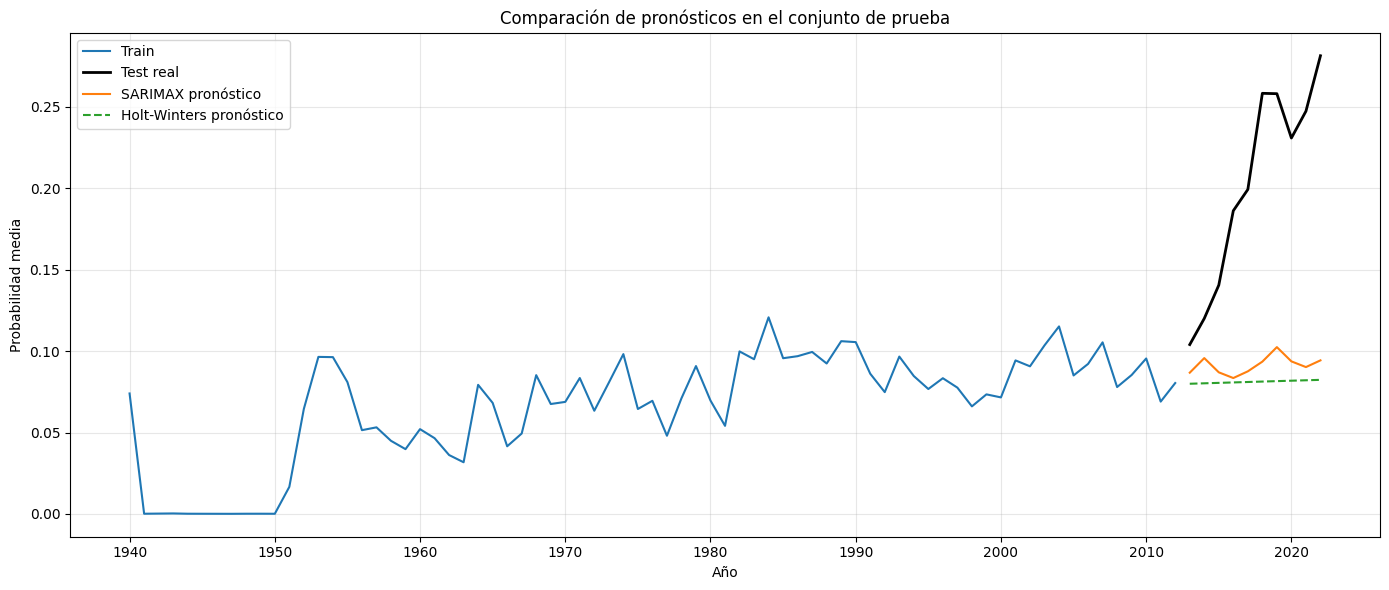

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(
    train,
    trend="add",
    seasonal=None,
    damped_trend=True,
    initialization_method="estimated",
)
hw_results = hw_model.fit(optimized=True)

hw_forecast = hw_results.forecast(len(test))

hw_rmse = float(np.sqrt(((hw_forecast - test) ** 2).mean()))
hw_mae = float((hw_forecast - test).abs().mean())
print(f"Holt-Winters RMSE: {hw_rmse:.5f} | MAE: {hw_mae:.5f}")

test_index = test.index.to_timestamp()

plt.figure(figsize=(14, 6))
plt.plot(train.index.to_timestamp(), train.values, label="Train", color="tab:blue")
plt.plot(test_index, test.values, label="Test real", color="black", linewidth=2)
plt.plot(test_index, sarimax_pred_test.values, label="SARIMAX pronóstico", color="tab:orange")
plt.plot(test_index, hw_forecast.values, label="Holt-Winters pronóstico", color="tab:green", linestyle="--")
plt.title("Comparación de pronósticos en el conjunto de prueba")
plt.xlabel("Año")
plt.ylabel("Probabilidad media")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
save_current_fig("comparacion_sarimax_holtwinters")
plt.show()

In [59]:
comparison_df = pd.DataFrame(
    {
        "Modelo": ["SARIMAX", "Holt-Winters"],
        "RMSE": [sarimax_rmse, hw_rmse],
        "MAE": [sarimax_mae, hw_mae],
    }
)
comparison_df

Modelo      RMSE       MAE
0       SARIMAX  0.109745  0.095652
1  Holt-Winters  0.135110  0.121461

### Interpretación de la comparación de modelos
- Holt-Winters ofrece una alternativa rápida basada en suavizado; permite capturar tendencias sin especificar componentes AR/MA.
- La tabla anterior facilita comparar RMSE/MAE para justificar cuál modelo serviría en la memoria.
- Si los errores son parecidos, se puede preferir Holt-Winters por simplicidad; si SARIMAX rinde mejor, se mantiene como modelo principal.
- Siguientes pasos sugeridos: ajustar hiperparámetros (p,d,q) con búsqueda en rejilla, probar Prophet u otras regresiones con variables exógenas y evaluar métricas con validación temporal (rolling-origin).

### Predicciones futuras
#### (SARIMAX Base vs SARIMAX + exógenas)

c:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Figura guardada en results\sarimax_forecast_full_series_base_vs_exog.png


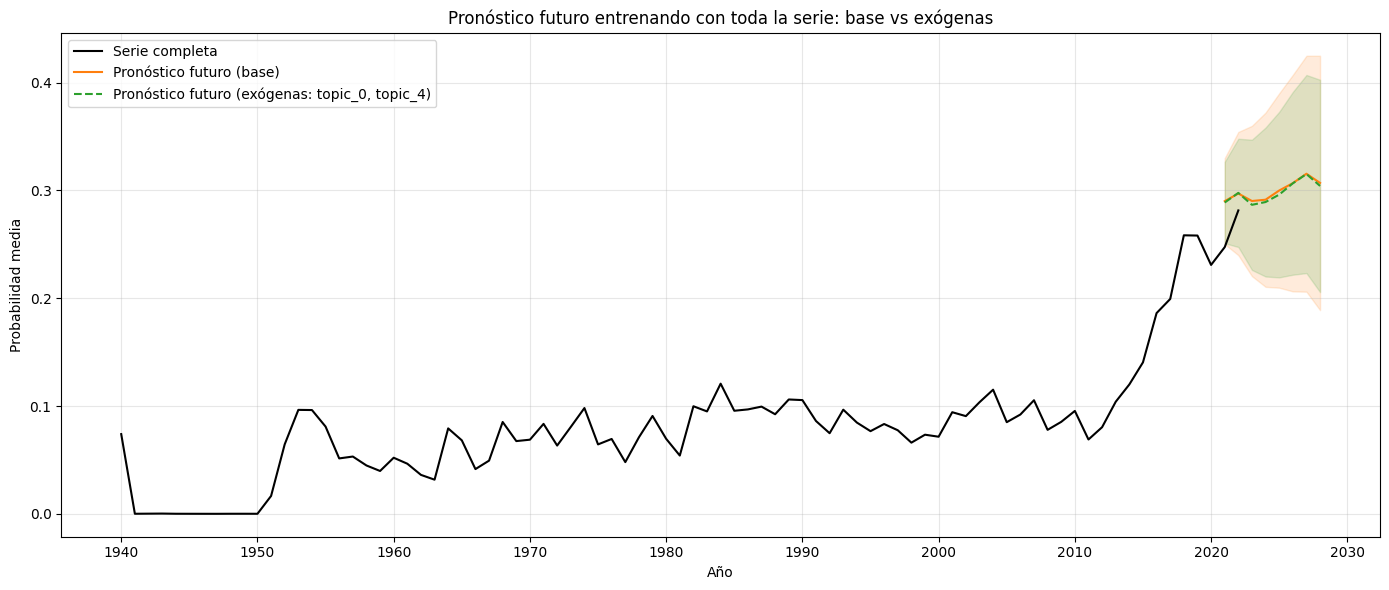

year  forecast_base  lower_ci_base  upper_ci_base  forecast_exog  \
0  2021       0.290072       0.250186       0.329958       0.288786   
1  2022       0.297084       0.239950       0.354218       0.297718   
2  2023       0.290193       0.220491       0.359894       0.286647   
3  2024       0.291390       0.210590       0.372191       0.289230   
4  2025       0.299926       0.209784       0.390067       0.296113   
5  2026       0.306754       0.206366       0.407142       0.306580   
6  2027       0.315486       0.206106       0.424866       0.315197   
7  2028       0.306940       0.188983       0.424896       0.304157   

   lower_ci_exog  upper_ci_exog  
0       0.251060       0.326512  
1       0.247531       0.347906  
2       0.226265       0.347029  
3       0.220165       0.358295  
4       0.219339       0.372887  
5       0.221829       0.391331  
6       0.223351       0.407042  
7       0.205707       0.402607

In [ ]:
forecast_horizon = 8

# ---- Base: sin exógenas ----
full_model_base = SARIMAX(
    sarimax_series,
    order=(1, 1, 1),
    seasonal_order=(0, 1, 1, 5),
    enforce_stationarity=False,
    enforce_invertibility=False,
 )
full_res_base = full_model_base.fit(disp=False)

future_fc_base = full_res_base.get_forecast(steps=forecast_horizon)
future_mean_base = future_fc_base.predicted_mean
future_ci_base = future_fc_base.conf_int()

# ---- Exógenas: usando toda la serie ----
exog_full = topics_yearly[top_exogs].reindex(sarimax_series.index)
full_model_exog = SARIMAX(
    sarimax_series,
    exog=exog_full,
    order=(1, 1, 1),
    seasonal_order=(0, 1, 1, 5),
    enforce_stationarity=False,
    enforce_invertibility=False,
 )
full_res_exog = full_model_exog.fit(disp=False)

# Exógenas futuras: escenario constante (last observation carried forward)
last_exog = exog_full.dropna().iloc[-1]
future_index = future_mean_base.index
future_exog = pd.DataFrame(
    np.tile(last_exog.values, (len(future_index), 1)),
    index=future_index,
    columns=exog_full.columns,
 )

future_fc_exog = full_res_exog.get_forecast(steps=forecast_horizon, exog=future_exog)
future_mean_exog = future_fc_exog.predicted_mean
future_ci_exog = future_fc_exog.conf_int()

# ---- Gráfico conjunto ----
plt.figure(figsize=(14, 6))
plt.plot(sarimax_series.index.to_timestamp(), sarimax_series.values, label="Serie completa", color="black")

plt.plot(
    future_mean_base.index.to_timestamp(),
    future_mean_base.values,
    label="Pronóstico futuro (base)",
    color="tab:orange",
    linestyle="-",
 )
plt.fill_between(
    future_mean_base.index.to_timestamp(),
    future_ci_base.iloc[:, 0],
    future_ci_base.iloc[:, 1],
    color="tab:orange",
    alpha=0.15,
 )

plt.plot(
    future_mean_exog.index.to_timestamp(),
    future_mean_exog.values,
    label=f"Pronóstico futuro (exógenas: {', '.join(top_exogs)})",
    color="tab:green",
    linestyle="--",
 )
plt.fill_between(
    future_mean_exog.index.to_timestamp(),
    future_ci_exog.iloc[:, 0],
    future_ci_exog.iloc[:, 1],
    color="tab:green",
    alpha=0.15,
 )

plt.title("Pronóstico futuro entrenando con toda la serie: base vs exógenas")
plt.xlabel("Año")
plt.ylabel("Probabilidad media")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
save_current_fig("sarimax_forecast_full_series_base_vs_exog")
plt.show()

# ---- Guardado de resultados ----
future_results = pd.DataFrame(
    {
        "year": future_mean_base.index.year,
        "forecast_base": future_mean_base.values,
        "lower_ci_base": future_ci_base.iloc[:, 0].values,
        "upper_ci_base": future_ci_base.iloc[:, 1].values,
        "forecast_exog": future_mean_exog.values,
        "lower_ci_exog": future_ci_exog.iloc[:, 0].values,
        "upper_ci_exog": future_ci_exog.iloc[:, 1].values,
    }
)

future_results.to_csv("results/future_results_base_vs_exog.csv", index=False)
future_results

### Comparación por periodos
El promedio anual puede ocultar diferencias entre etapas históricas. A continuación se contrasta la probabilidad media del tópico 5 y la fracción de canciones con carga vulgar alta (>0.15) por década.

Figura guardada en results\topic5_decadas.png


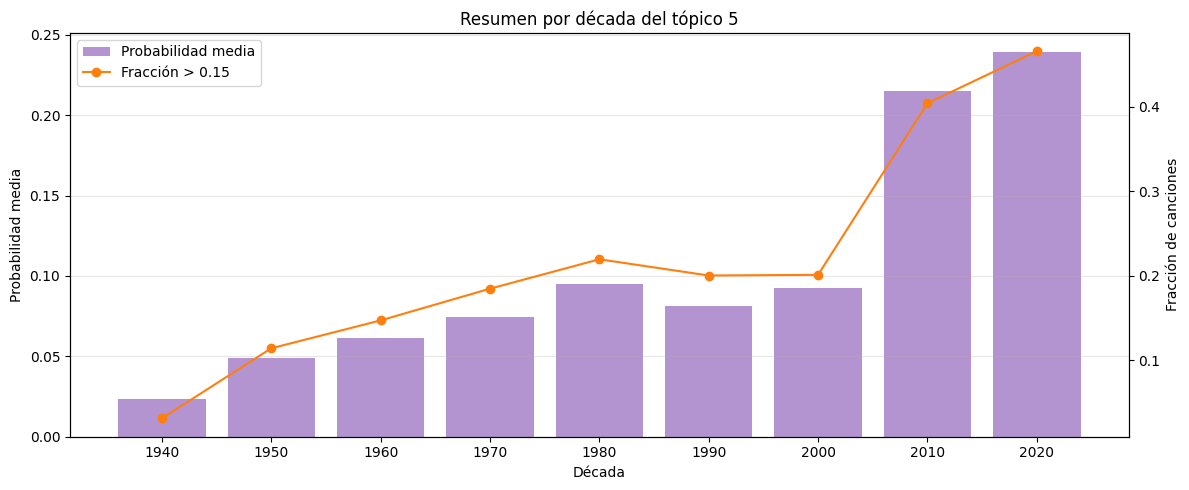

decade  mean_prob  share_high
0    1940   0.023280    0.031250
1    1950   0.048979    0.114206
2    1960   0.061162    0.147250
3    1970   0.074145    0.184800
4    1980   0.095164    0.219600
5    1990   0.081044    0.200400
6    2000   0.092404    0.201200
7    2010   0.215281    0.404400
8    2020   0.239199    0.466000

In [61]:
decade_stats = (
    doc_topic_year.assign(decade=(doc_topic_year["year"] // 10) * 10)
    .groupby("decade")["topic_5"]
    .agg(mean_prob="mean", share_high=lambda s: (s > 0.15).mean())
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(12, 5))
bars = ax1.bar(
    decade_stats["decade"].astype(str),
    decade_stats["mean_prob"],
    color="tab:purple",
    alpha=0.7,
    label="Probabilidad media",
)
ax1.set_ylabel("Probabilidad media")
ax1.set_xlabel("Década")

ax2 = ax1.twinx()
ax2.plot(
    decade_stats["decade"].astype(str),
    decade_stats["share_high"],
    color="tab:orange",
    marker="o",
    label="Fracción > 0.15",
)
ax2.set_ylabel("Fracción de canciones")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")
ax1.set_title("Resumen por década del tópico 5")
ax1.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
save_current_fig("topic5_decadas")
plt.show()


decade_stats.to_csv('results/decade_stats.csv')
decade_stats

### Análisis de volatilidad con ARCH/GARCH
Se exploran los retornos porcentuales año a año del tópico 5: ADF para estacionariedad y un GARCH(1,1) para detectar clústeres de varianza.

In [8]:
!pip install arch

import warnings
import statsmodels.api as sm
import arch
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
topic_vulgar

year
1940    0.074025
1941    0.000156
1943    0.000334
1944    0.000159
1945    0.000139
          ...   
2018    0.258376
2019    0.258148
2020    0.230913
2021    0.247406
2022    0.281457
Name: topic_5, Length: 81, dtype: float64

In [64]:
sts.adfuller(topic_vulgar.values)

(0.5279363620724857,
 0.9856979162003788,
 2,
 78,
 {'1%': -3.517113604831504,
  '5%': -2.8993754262546574,
  '10%': -2.5869547797501644},
 -334.25194131894716)

No es una serie estacionaria porque el estadístico ADF (0.5279) y el p-value es muy alto (0.9856).

In [9]:
returns = topic_vulgar.pct_change().dropna()
returns.name = "returns"
returns

year
1941   -0.997892
1943    1.140755
1944   -0.523625
1945   -0.126320
1947   -0.241077
          ...   
2018    0.296072
2019   -0.000882
2020   -0.105500
2021    0.071426
2022    0.137631
Name: returns, Length: 80, dtype: float64

Figura guardada en results\topic5_retornos.png


<Figure size 1200x800 with 0 Axes>

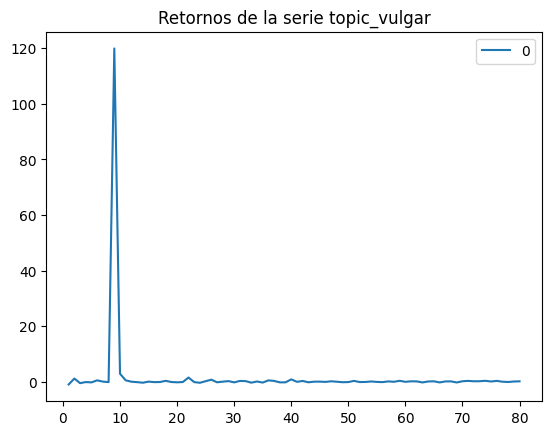

In [66]:
plt.figure(figsize=(12,8))
returns.plot()
plt.title('Retornos de la serie topic_vulgar')
save_current_fig("topic5_retornos")
plt.show()

Figura guardada en results\topic5_retornos_cuadrado.png


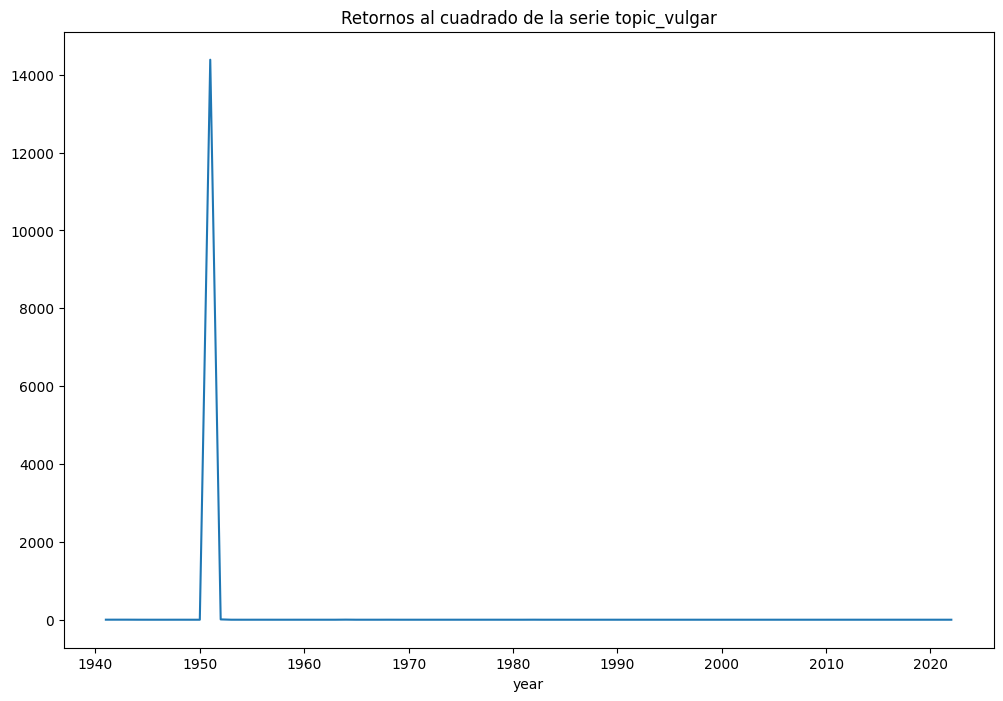

In [10]:
sq_returns = returns ** 2
sq_returns.name = "sq_returns"

plt.figure(figsize=(12, 8))
sq_returns.plot()
plt.title('Retornos al cuadrado de la serie topic_vulgar')
save_current_fig("topic5_retornos_cuadrado")
plt.show()

Figura guardada en results\topic5_pacf_retornos.png


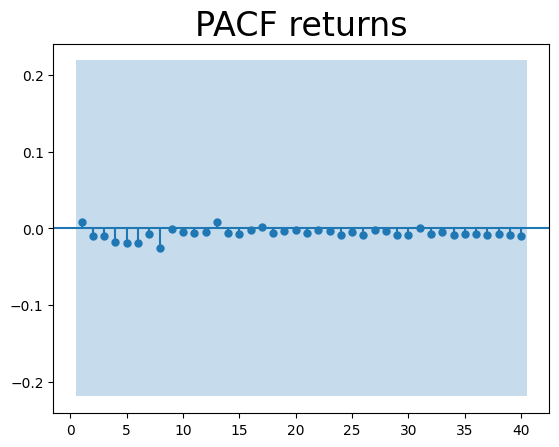

In [ ]:
sgt.plot_pacf(sq_returns, lags=40, zero=False)
plt.title("PACF retornos al cuadrado", size=24)
plt.autoscale()
save_current_fig("topic5_pacf_retornos_cuadrado")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sq_returns_scaled = pd.Series(
    scaler.fit_transform(sq_returns.values.reshape(-1, 1)).ravel(),
    index=sq_returns.index,
    name="sq_returns_scaled",
)

model = arch.arch_model(sq_returns_scaled, mean="Zero", vol="GARCH", p=1, q=1, rescale=False)
results = model.fit(disp="off")
print(results.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:      sq_returns_scaled   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.012
Vol Model:                      GARCH   Log-Likelihood:               -22.3358
Distribution:                  Normal   AIC:                           50.6716
Method:            Maximum Likelihood   BIC:                           57.8177
                                        No. Observations:                   80
Date:                Thu, Dec 18 2025   Df Residuals:                       80
Time:                        10:42:31   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.1286e-03  6.373e-04      1.771  7.658e-02 

**Conclusión de volatilidad.** El GARCH(1,1) sugiere clústeres de varianza en los 2000 y 2010: picos de volatilidad que luego se disipan, coherente con cambios de mercado puntuales.